In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import yahoofinancials

import sys
sys.path.append("../../../LorenzCaosTest")
from Test_Chaos import caostest10
from Test_Chaos_noparallel import caostest10_noparallel

2020-12-06 12:12:30,022	INFO resource_spec.py:212 -- Starting Ray with 11.62 GiB memory available for workers and up to 5.83 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-12-06 12:12:30,320	INFO services.py:1148 -- View the Ray dashboard at localhost:8265


In [2]:
# carica simboli
simboli = pd.read_csv('symbols_italiani.txt', sep='\t')['Ticker']
simboli = simboli.astype(str) + '.MI'
yahoo_financials = list(map(lambda x: yahoofinancials.YahooFinancials(x), simboli))

# Scarica nuovi dati

# Carica dati da file

In [3]:
dati = np.load('tutte_serie_storiche_MI.npy', allow_pickle=True)
dati = dati.item()

In [4]:
dati_tabulari={}
for d, v in dati.items():
     dati_tabulari[d] = pd.DataFrame(v[d]['prices']).drop('date', axis=1).set_index('formatted_date')

In [5]:
grafici_da_plottare = [dati_tabulari[sim]['close'].dropna() for sim in simboli]
%store grafici_da_plottare

Stored 'grafici_da_plottare' (list)


2020-12-12 10:30:08,674	WARNING worker.py:1072 -- The node with client ID d944a1f1d20b970819c71856858aa74633d0fc86 has been marked dead because the monitor has missed too many heartbeats from it.


(pid=raylet) F1212 10:30:08.671339 35817 node_manager.cc:523]  Check failed: node_id != self_node_id_ Exiting because this node manager has mistakenly been marked dead by the monitor.
(pid=raylet) *** Check failure stack trace: ***
(pid=raylet)     @     0x55a2ccc4111d  google::LogMessage::Fail()
(pid=raylet)     @     0x55a2ccc4258c  google::LogMessage::SendToLog()
(pid=raylet)     @     0x55a2ccc40df9  google::LogMessage::Flush()
(pid=raylet)     @     0x55a2ccc41011  google::LogMessage::~LogMessage()
(pid=raylet)     @     0x55a2cc9058f9  ray::RayLog::~RayLog()
(pid=raylet)     @     0x55a2cc71379b  ray::raylet::NodeManager::NodeRemoved()
(pid=raylet)     @     0x55a2cc71398c  _ZNSt17_Function_handlerIFvRKN3ray8ClientIDERKNS0_3rpc11GcsNodeInfoEEZNS0_6raylet11NodeManager11RegisterGcsEvEUlS3_S7_E0_E9_M_invokeERKSt9_Any_dataS3_S7_
(pid=raylet)     @     0x55a2cc7c8a82  ray::gcs::ClientTable::HandleNotification()
(pid=raylet)     @     0x55a2cc7c8f6b  _ZNSt17_Function_handlerIFvPN3ray3g

In [6]:
def plot_tanti_df(array):
    n_plots = len(array)
    cols=3
    rows = round(n_plots/cols)
    fig, axs = plt.subplots(rows, cols, figsize=(20,5*rows))
    for i, ax in enumerate(axs.flat):
        if(i< len(array)):
            array[i].plot(ax=ax)
        #ax.set_title(0)  TODO: aggiungere il titolo
        
def plot_tanti_array(array, ylim=None):
    n_plots = len(array)
    cols=3
    rows = round(n_plots/cols)
    fig, axs = plt.subplots(rows, cols, figsize=(20,5*rows))
    for i, ax in enumerate(axs.flat):
        if(i< len(array)):
            #array[i].plot(ax=ax)
            #ax.plot(array[i])
            ax.scatter(*zip(*array[i]), s=1)
            if(ylim):
                ax.set_ylim(ylim)
        #ax.set_title(0)  TODO: aggiungere il titolo
        

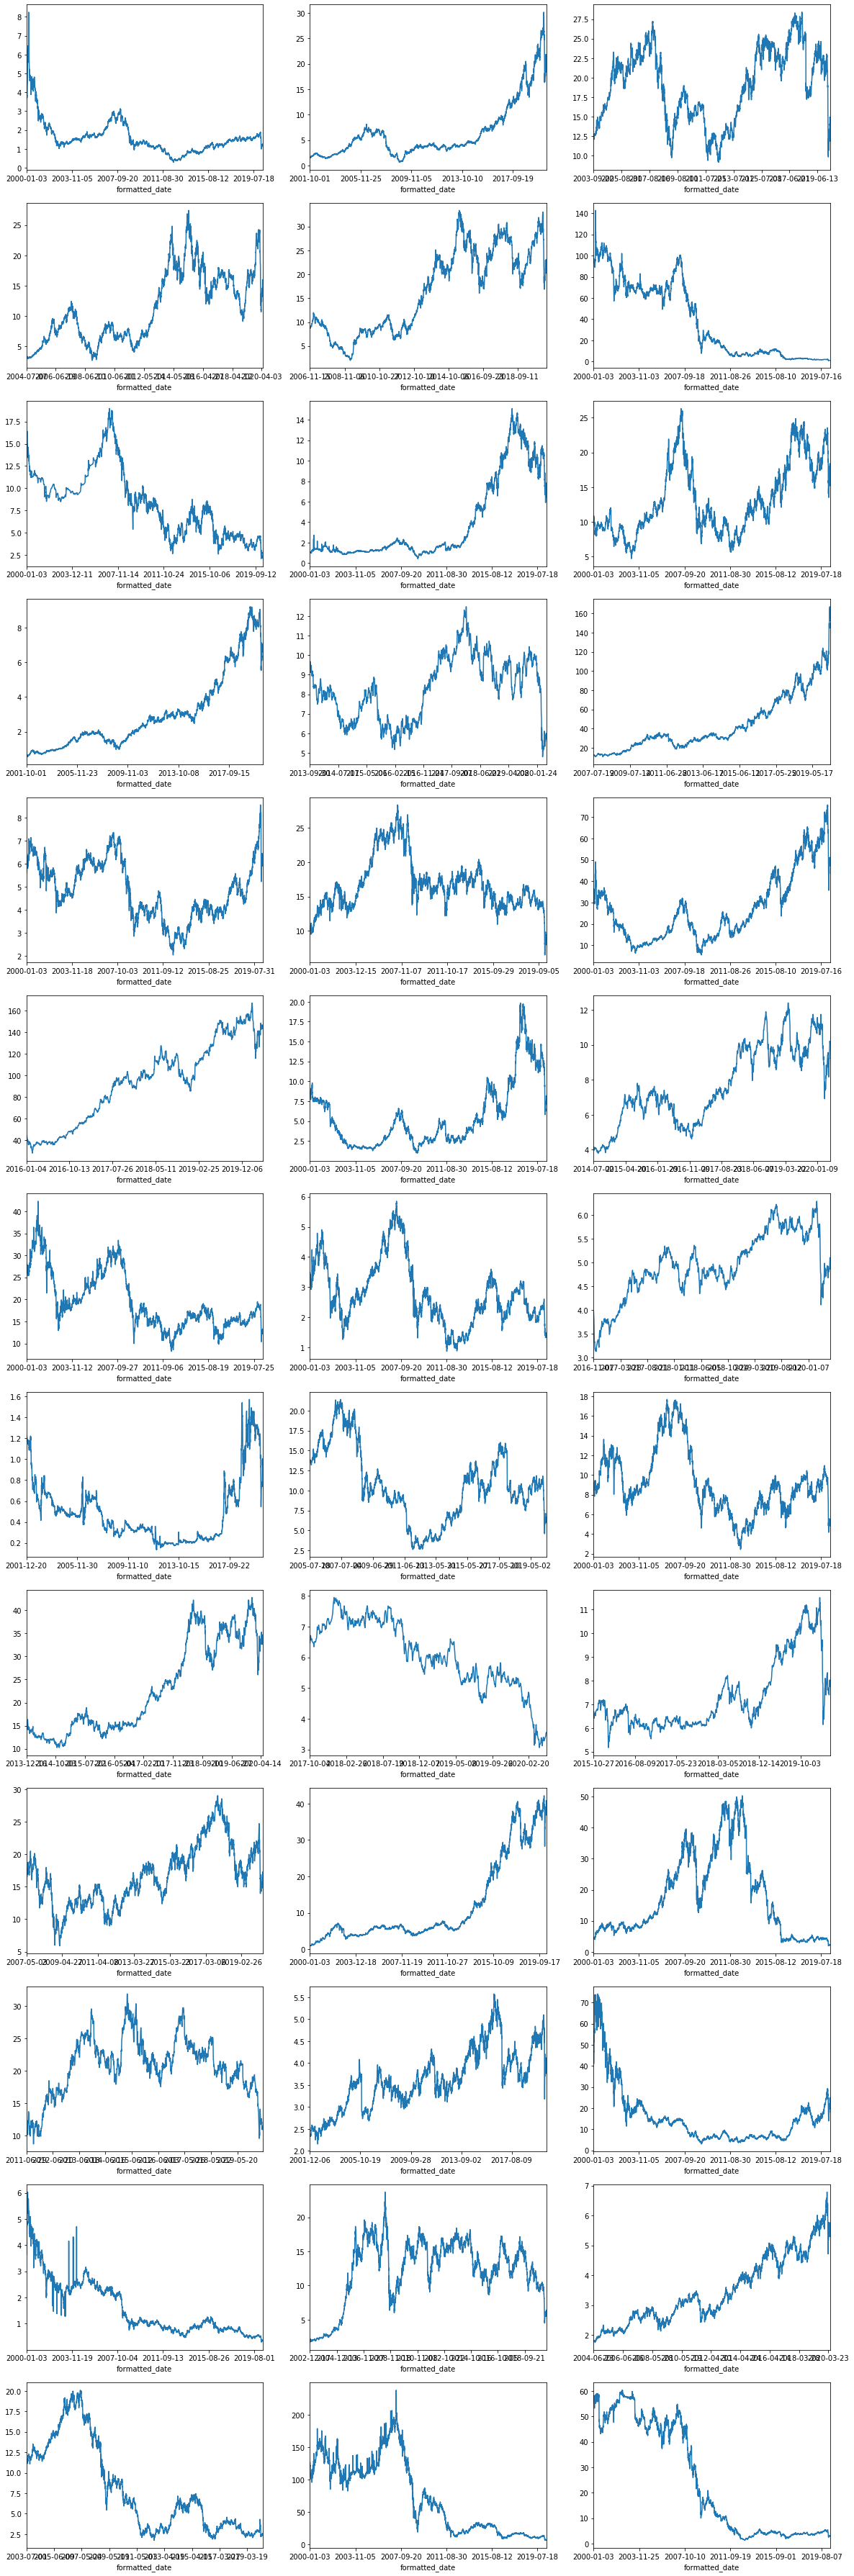

In [9]:
#s1=dati_tabulari[simboli[1]]['close'].dropna()
#s1.plot()

plot_tanti_df(grafici_da_plottare)

In [8]:
tutti_dati = [v['close'].dropna().values for v in dati_tabulari.values()]

In [15]:
res = list(map(lambda x: caostest10(x, iters=1000), tutti_dati))

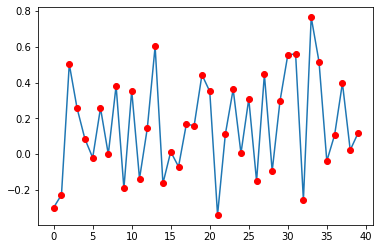

In [18]:
plt.plot(np.array(res))
plt.plot(np.array(res), 'ro')

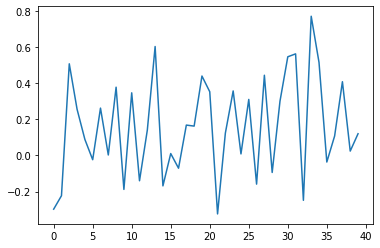

# Studio  in funzione di c, p vs q

In [224]:
res = list(map(lambda x: caostest10_noparallel(x, True, iterations=300), tutti_dati))

In [225]:
rs = np.array(res).T[0]
rsc = np.array(res).T[1]
parr = np.array(res).T[2]
qarr = np.array(res).T[3]

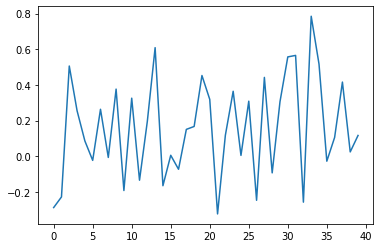

In [226]:
plt.plot(np.array(rs))

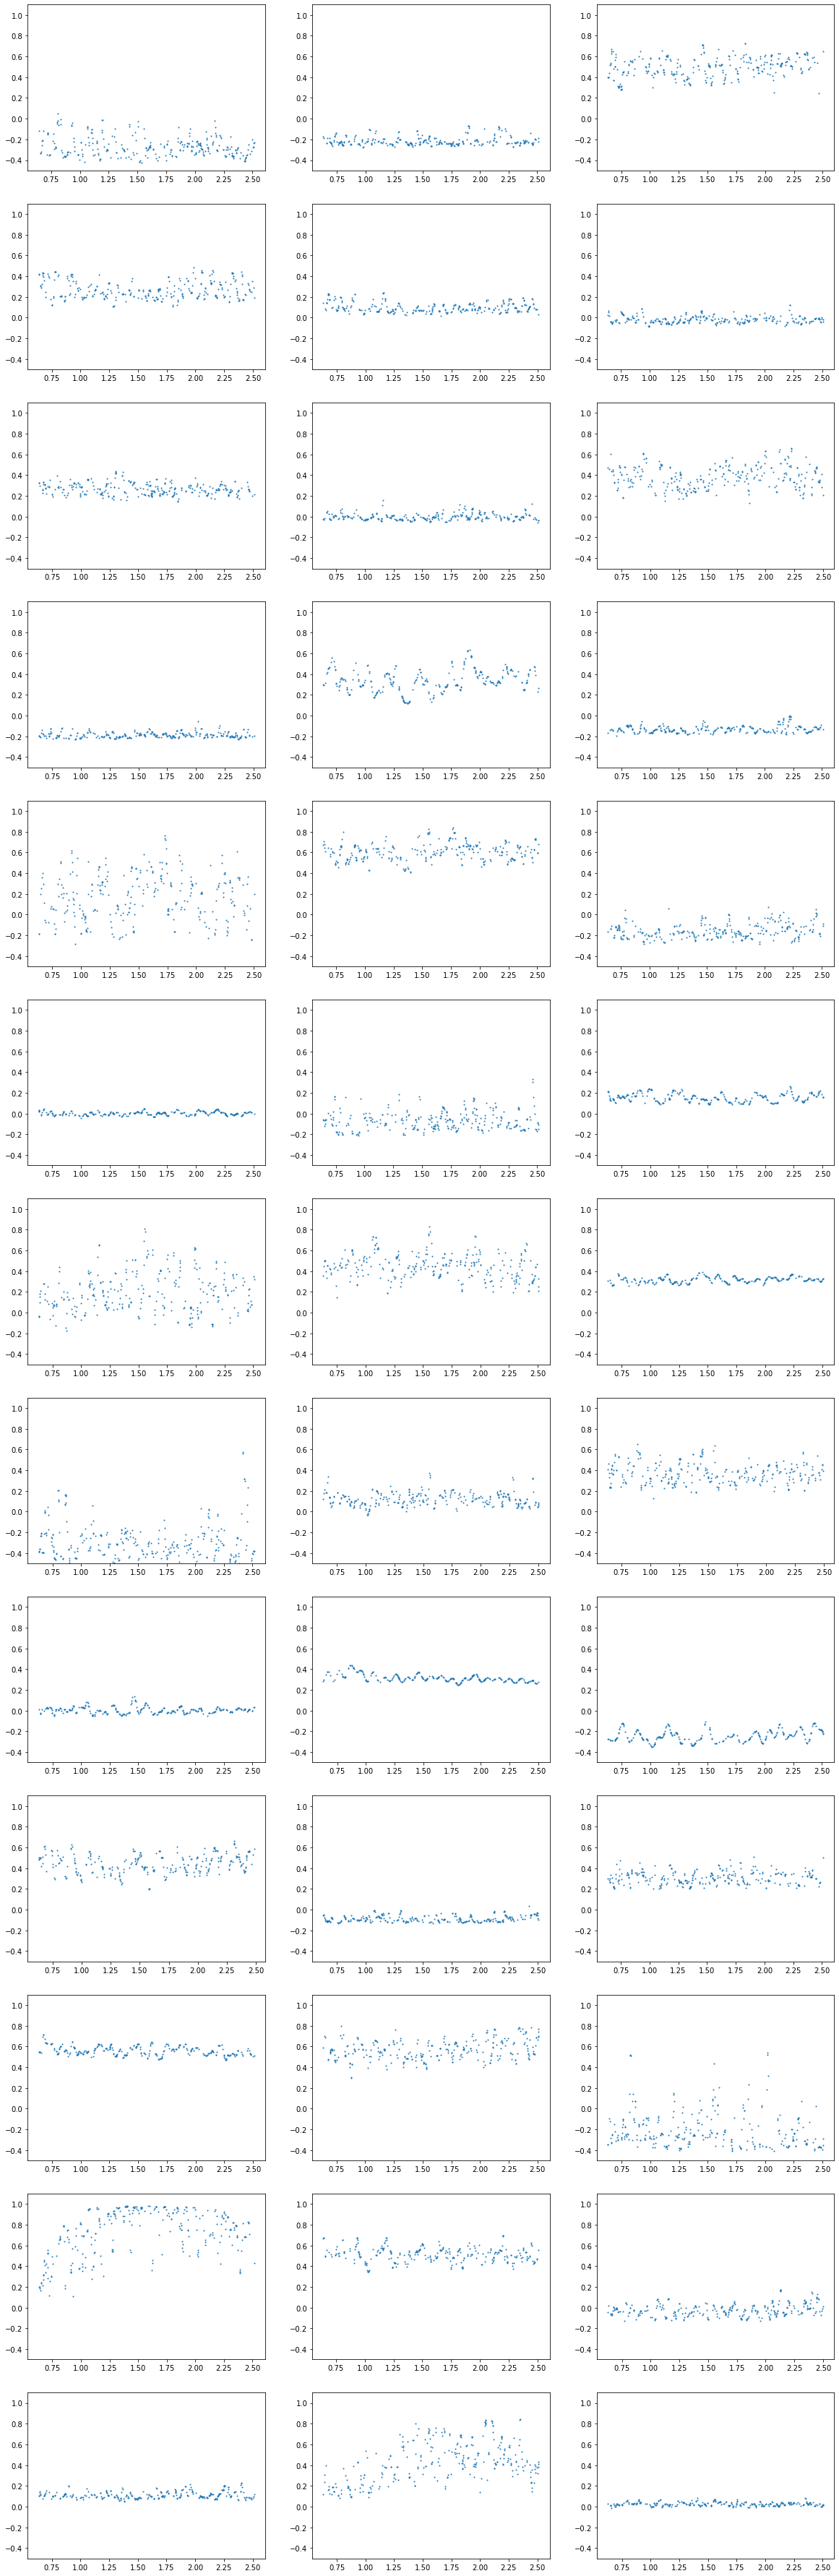

In [229]:
# Risultato in funzione del parametro c
plot_tanti_array(rsc, ylim=[-0.5,1.1])

In [209]:
len(parr[1][100])

4214

In [238]:
#pqarr = np.zeros((10,800,2), dtype=float)
pqarr39=[]
for i in list(range(100)):
    pqarr39.append(list(zip(parr[39][i],qarr[39][i])))

pqarr34=[]
for i in list(range(100)):
    pqarr34.append(list(zip(parr[34][i],qarr[34][i])))
    
pqarr26=[]
for i in list(range(100)):
    pqarr26.append(list(zip(parr[26][i],qarr[26][i])))

pqarr10=[]
for i in list(range(100)):
    pqarr10.append(list(zip(parr[10][i],qarr[10][i])))

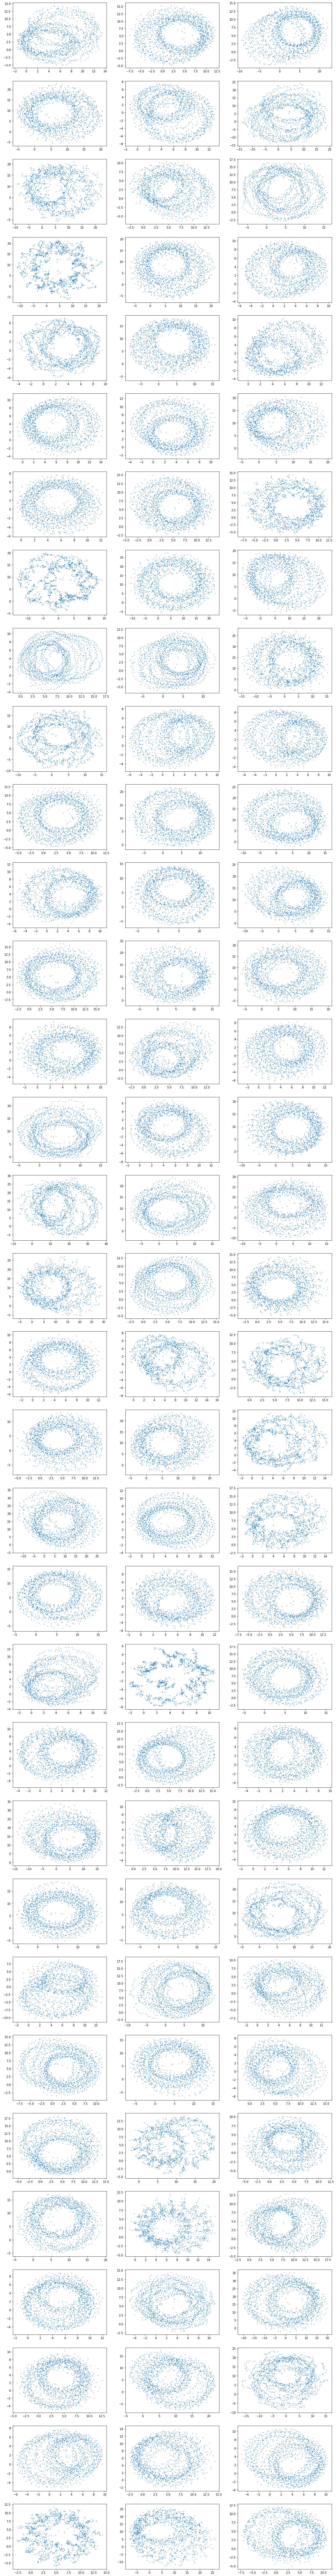

In [239]:
plot_tanti_array(pqarr10)